In [33]:
# PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install matplotlib

In [34]:
import requests
import pandas as pd
import io

# Remplacez par l'URL brute du fichier dans votre dépôt GitHub
url = "https://github.com/gaojing33/Stat-Data-Science/raw/main/clean_EU_income.csv"

# Téléchargez le fichier avec requests
response = requests.get(url)
response.raise_for_status()  # Vérifiez si la requête a réussi

income = pd.read_csv(io.StringIO(response.content.decode('utf-8')))  # Read as CSV using StringIO
income.head(10)

,Unnamed: 0,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Belgium,21705.0,21654.0,22295.0,22733.0,23686,24608.0,25672.0,25855.0,27314.0,28997.0
1,Bulgaria,3311.0,3332.0,3151.0,3590.0,3590,4224.0,4612.0,5157.0,5378.0,6523.0
2,Czechia,7622.0,7423.0,7838.0,8282.0,9088,9995.0,10627.0,10625.0,12146.0,13656.0
3,Denmark,27861.0,28364.0,28665.0,29383.0,30104,30717.0,30681.0,32088.0,33260.0,33903.0
4,Germany,19733.0,20668.0,21275.0,21920.0,22713,23515.0,26008.0,24946.0,24925.0,26274.0
5,Estonia,7217.0,7889.0,8645.0,9384.0,10524,11461.0,12228.0,12623.0,14827.0,15128.0
6,Ireland,20171.0,21629.0,22544.0,22879.0,24920,25422.0,26766.0,28762.0,30063.0,30689.0
7,Greece,7680.0,7520.0,7500.0,7600.0,7863,8195.0,8781.0,8752.0,9520.0,10050.0
8,Spain,13269.0,13352.0,13681.0,14203.0,14785,15015.0,16043.0,15892.0,16814.0,18316.0
9,France,21199.0,21415.0,21713.0,21960.0,22220,22562.0,22143.0,22732.0,23053.0,24179.0


Univariable analysis

In [ ]:
income

In [35]:
income2 = income.rename(columns={"Unnamed: 0": "Country"})
income2

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Belgium,21705.0,21654.0,22295.0,22733.0,23686,24608.0,25672.0,25855.0,27314.0,28997.0
1,Bulgaria,3311.0,3332.0,3151.0,3590.0,3590,4224.0,4612.0,5157.0,5378.0,6523.0
2,Czechia,7622.0,7423.0,7838.0,8282.0,9088,9995.0,10627.0,10625.0,12146.0,13656.0
3,Denmark,27861.0,28364.0,28665.0,29383.0,30104,30717.0,30681.0,32088.0,33260.0,33903.0
4,Germany,19733.0,20668.0,21275.0,21920.0,22713,23515.0,26008.0,24946.0,24925.0,26274.0
5,Estonia,7217.0,7889.0,8645.0,9384.0,10524,11461.0,12228.0,12623.0,14827.0,15128.0
6,Ireland,20171.0,21629.0,22544.0,22879.0,24920,25422.0,26766.0,28762.0,30063.0,30689.0
7,Greece,7680.0,7520.0,7500.0,7600.0,7863,8195.0,8781.0,8752.0,9520.0,10050.0
8,Spain,13269.0,13352.0,13681.0,14203.0,14785,15015.0,16043.0,15892.0,16814.0,18316.0
9,France,21199.0,21415.0,21713.0,21960.0,22220,22562.0,22143.0,22732.0,23053.0,24179.0


Data cleaning

In [60]:
selected_columns = ['Country', '2014', '2016', '2018', '2020', '2022']
newincome = income2[selected_columns]

# Display the new DataFrame
print(newincome)

            Country     2014     2016   2018     2020     2022
0           Belgium  21705.0  22295.0  23686  25672.0  27314.0
1          Bulgaria   3311.0   3151.0   3590   4612.0   5378.0
2           Czechia   7622.0   7838.0   9088  10627.0  12146.0
3           Denmark  27861.0  28665.0  30104  30681.0  33260.0
4           Germany  19733.0  21275.0  22713  26008.0  24925.0
5           Estonia   7217.0   8645.0  10524  12228.0  14827.0
6           Ireland  20171.0  22544.0  24920  26766.0  30063.0
7            Greece   7680.0   7500.0   7863   8781.0   9520.0
8             Spain  13269.0  13681.0  14785  16043.0  16814.0
9            France  21199.0  21713.0  22220  22143.0  23053.0
10          Croatia   5256.0   5786.0   6596   7770.0   8760.0
11            Italy  15759.0  16247.0  16844  18067.0  18592.0
12           Cyprus  14400.0  14020.0  15336  16704.0  17856.0
13           Latvia   5203.0   6365.0   7333   8827.0  10258.0
14        Lithuania   4823.0   5645.0   6895   8606.0  

In [68]:
# Remove rows with NaN values
income_clean = newincome.dropna()

# Display the cleaned DataFrame
income_clean.describe()

,2014,2016,2018,2020,2022
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,14556.906250,15044.968750,15901.000000,17102.281250,18472.281250
std,11155.349969,11207.358399,11174.318289,11264.309845,11962.918603
min,2155.000000,2432.000000,2739.000000,3128.000000,2804.000000
25%,5242.750000,5859.500000,6820.250000,8460.000000,8914.250000
50%,12358.500000,12972.000000,14012.500000,15408.500000,16679.000000
75%,21325.500000,22591.250000,24148.000000,25704.250000,26882.000000
max,43775.000000,44253.000000,43013.000000,43051.000000,45405.000000


In [69]:
import numpy as np

# Assuming 'Country' is the column containing country names in both DataFrames
common_countries = np.intersect1d(income_clean['Country'], euwaste_clean['Country'])

# Print the common countries
print("Common Countries:", common_countries)

# Print the number of common countries
print("Number of Common Countries:", len(common_countries))

Common Countries: ['Austria' 'Belgium' 'Bulgaria' 'Cyprus' 'Czechia' 'Denmark' 'Estonia'
 'Finland' 'France' 'Germany' 'Hungary' 'Ireland' 'Italy' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Türkiye']
Number of Common Countries: 26


Data cleaning (old process)

In [ ]:
#data cleaning
#rows_with_nan = [index for index, row in income2.iterrows() if row.isna().any()]
#print(rows_with_nan) #identifying rows with nan

#Delete countries with too many nan values (<=3)
#nan_count_per_row = income2.isna().sum(axis=1)# Calculate the number of NaN values in each row
#rows_to_drop = nan_count_per_row[nan_count_per_row >= 3].index # Get the indices of rows with 3 or more NaNs
#income_clean = income2.drop(rows_to_drop) # Drop the rows and update the DataFrame

#Mean for missing values

#year_columns = income_clean.columns[income_clean.columns.get_loc('2014'):] # Get a list of columns representing years (starting from '2014')

#for col in year_columns: # Convert year columns to numeric before interpolation
    # Attempt to convert to numeric, coercing errors to NaN
    #income_clean[col] = pd.to_numeric(income_clean[col], errors='coerce')

#income_clean[year_columns] = income_clean[year_columns].interpolate(method='linear', axis=1, limit_direction='both')



# Get the list of columns to drop (years <= 2014 and  > 2022)
#columns_to_drop = [col for col in income2.columns if isinstance(col, (int, float)) and (col <= 2014 or col == 2023)]
#income_clean = income2.drop(columns=columns_to_drop)
#income_clean= income_clean.drop(columns=["2023"])
#income_clean

In [71]:
# Calculate the average and add a new column
columns_to_average = income_clean.columns[income_clean.columns.get_loc('2014'):income_clean.columns.get_loc('2022') + 1]
income_clean['Average'] = income_clean[columns_to_average].mean(axis=1)
income_clean.head(2)
#générer le csv

,Country,2014,2016,2018,2020,2022,Average
0,Belgium,21705.0,22295.0,23686,25672.0,27314.0,24134.4
1,Bulgaria,3311.0,3151.0,3590,4612.0,5378.0,4008.4


count       32.00000
mean     16215.48750
std      11297.46305
min       3167.80000
25%       7162.70000
50%      14339.00000
75%      24643.05000
max      42776.80000
Name: Average, dtype: float64
Skewness: 0.781681604790368


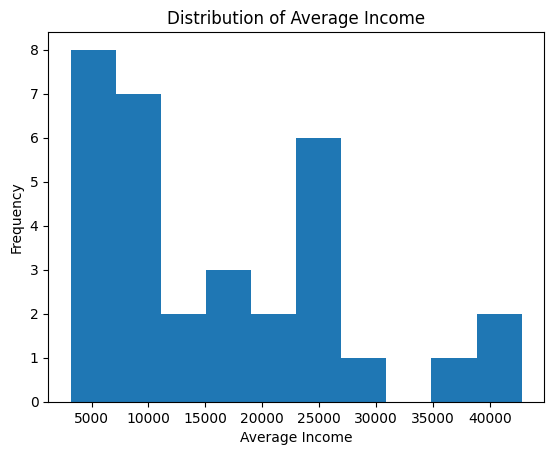

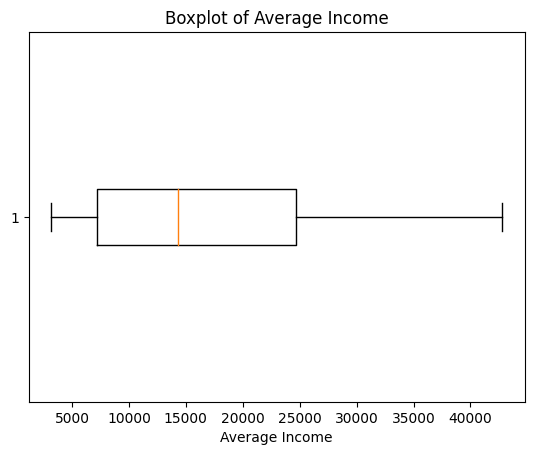

In [72]:
# Descriptive statistics
print(income_clean['Average'].describe())

# Skewness
print(f"Skewness: {income_clean['Average'].skew()}")

# Histogram
plt.hist(income_clean['Average'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Average Income')
plt.ylabel('Frequency')
plt.title('Distribution of Average Income')
plt.show()

# Boxplot
plt.figure()  # Create a new figure for the boxplot
plt.boxplot(income_clean['Average'], vert=False)  # vert=False makes it horizontal
plt.xlabel('Average Income')
plt.title('Boxplot of Average Income')
plt.show()

Merge data

In [73]:
import requests
import pandas as pd
import io

# Remplacez par l'URL brute du fichier dans votre dépôt GitHub
url = "https://github.com/gaojing33/Stat-Data-Science/raw/main/waste_per_capita.csv"

# Téléchargez le fichier avec requests
response = requests.get(url)
response.raise_for_status()  # Vérifiez si la requête a réussi

euwaste = pd.read_csv(io.StringIO(response.content.decode('utf-8')))  # Read as CSV using StringIO
euwaste

,Country,2004,2006,2008,2012,2014,2016,2018,2020,2022
0,Belgium,0.512215,0.451431,0.418039,0.478042,0.484672,0.445686,0.428573,0.463651,0.413803
1,Bulgaria,0.340031,0.383909,0.386688,0.375930,0.376963,0.409341,0.465519,0.351965,0.389528
2,Czechia,0.278699,0.340587,0.307072,0.307711,0.310165,0.339176,0.547108,0.571200,0.409919
3,Denmark,0.373535,0.381327,0.459140,0.597256,0.636289,0.609804,0.608520,0.621343,0.554927
4,Germany,0.460524,0.420025,0.434881,0.454037,0.456714,0.455243,0.450632,0.462613,0.436443
5,Estonia,0.294228,0.304755,0.328721,0.329320,0.366497,0.326672,0.415608,0.414102,0.436438
6,Ireland,0.422539,0.470209,0.376273,0.360986,0.328677,0.320240,0.327699,0.387372,0.356990
7,Greece,0.385084,0.375534,0.357518,NaN,NaN,0.444089,0.428946,0.421654,0.381985
8,Spain,0.573712,0.547110,0.534966,0.453335,0.433581,0.467255,0.486638,0.475703,0.499114
9,France,0.412390,0.424361,0.457925,0.455063,0.428835,0.436024,0.444378,0.497135,0.510826


Data cleaning

In [74]:
#data cleaning
rows_with_nan = [index for index, row in euwaste.iterrows() if row.isna().any()]
#print(rows_with_nan) #identifying rows with nan

#Delete countries with too many nan values (<=3)
nan_count_per_row = euwaste.isna().sum(axis=1)# Calculate the number of NaN values in each row
rows_to_drop = nan_count_per_row[nan_count_per_row >= 1].index # Get the indices of rows with 1 or more NaNs
euwaste_clean = euwaste.drop(rows_to_drop) # Drop the rows and update the DataFrame


# Get the list colums to drop (years <2014)
year_columns = euwaste_clean.columns[euwaste_clean.columns.get_loc('2014'):]
columns_to_drop = [col for col in euwaste_clean.columns if col != 'Country' and col not in year_columns]
euwaste_clean = euwaste_clean.drop(columns=columns_to_drop)

euwaste_clean

,Country,2014,2016,2018,2020,2022
0,Belgium,0.484672,0.445686,0.428573,0.463651,0.413803
1,Bulgaria,0.376963,0.409341,0.465519,0.351965,0.389528
2,Czechia,0.310165,0.339176,0.547108,0.571200,0.409919
3,Denmark,0.636289,0.609804,0.608520,0.621343,0.554927
4,Germany,0.456714,0.455243,0.450632,0.462613,0.436443
5,Estonia,0.366497,0.326672,0.415608,0.414102,0.436438
6,Ireland,0.328677,0.320240,0.327699,0.387372,0.356990
8,Spain,0.433581,0.467255,0.486638,0.475703,0.499114
9,France,0.428835,0.436024,0.444378,0.497135,0.510826
11,Italy,0.491363,0.500578,0.503160,0.485318,0.492228


In [75]:
# Calculate the average and add a new column
columns_to_average = euwaste_clean.columns[euwaste_clean.columns.get_loc('2014'):] # Update columns_to_average
columns_to_average = columns_to_average[columns_to_average != 'Country'] # Exclude 'Country' column

euwaste_clean['Average'] = euwaste_clean[columns_to_average].mean(axis=1)
euwaste_clean.head(2)

,Country,2014,2016,2018,2020,2022,Average
0,Belgium,0.484672,0.445686,0.428573,0.463651,0.413803,0.447277
1,Bulgaria,0.376963,0.409341,0.465519,0.351965,0.389528,0.398663


count    26.000000
mean      0.409190
std       0.080526
min       0.213882
25%       0.361059
50%       0.413171
75%       0.458328
max       0.606177
Name: Average, dtype: float64
Skewness: -0.1063006226647764


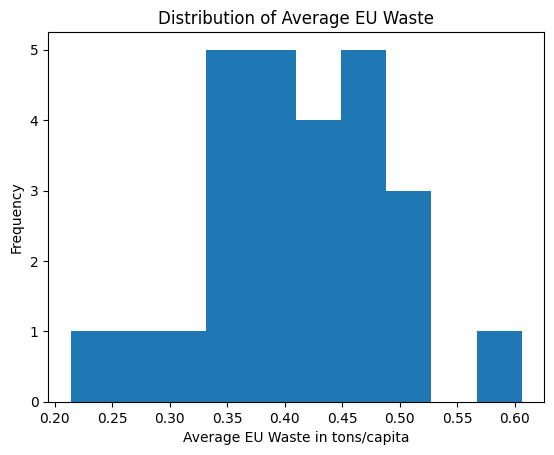

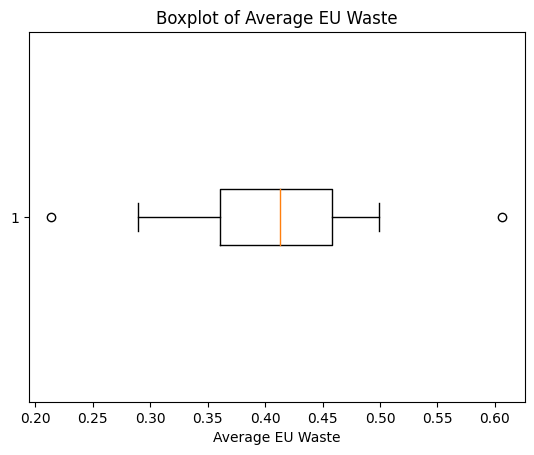

In [76]:
# Descriptive statistics
print(euwaste_clean['Average'].describe())

# Skewness
print(f"Skewness: {euwaste_clean['Average'].skew()}")

# Histogram
plt.hist(euwaste_clean['Average'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Average EU Waste in tons/capita')
plt.ylabel('Frequency')
plt.title('Distribution of Average EU Waste')
plt.show()

# Boxplot
plt.figure()  # Create a new figure for the boxplot
plt.boxplot(euwaste_clean['Average'], vert=False)  # vert=False makes it horizontal
plt.xlabel('Average EU Waste')
plt.title('Boxplot of Average EU Waste')
plt.show()

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

#'income_clean' and 'euwaste_clean' are the dataframes

# 1. Merge dataframes based on common countries
merged_df = pd.merge(income_clean, euwaste_clean, on='Country', how='inner')

# 2. Find common columns, considering potential renaming after merge
# Get suffixes used for renaming (e.g., '_x', '_y')
suffixes = ('_x', '_y')
# Extract common columns while ignoring suffixes
common_columns = [col for col in merged_df.columns
                  if any(col.endswith(suffix) or col in euwaste_clean.columns and col in income_clean.columns
                         for suffix in suffixes)]

# 3. Keep only common columns in merged_df
merged_df = merged_df[[c for c in common_columns if c in merged_df.columns]]  # Use list comprehension for filtering
merged_df

,Country,2014_x,2016_x,2018_x,2020_x,2022_x,Average_x,2014_y,2016_y,2018_y,2020_y,2022_y,Average_y
0,Belgium,21705.0,22295.0,23686,25672.0,27314.0,24134.4,0.484672,0.445686,0.428573,0.463651,0.413803,0.447277
1,Bulgaria,3311.0,3151.0,3590,4612.0,5378.0,4008.4,0.376963,0.409341,0.465519,0.351965,0.389528,0.398663
2,Czechia,7622.0,7838.0,9088,10627.0,12146.0,9464.2,0.310165,0.339176,0.547108,0.571200,0.409919,0.435513
3,Denmark,27861.0,28665.0,30104,30681.0,33260.0,30114.2,0.636289,0.609804,0.608520,0.621343,0.554927,0.606177
4,Germany,19733.0,21275.0,22713,26008.0,24925.0,22930.8,0.456714,0.455243,0.450632,0.462613,0.436443,0.452329
5,Estonia,7217.0,8645.0,10524,12228.0,14827.0,10688.2,0.366497,0.326672,0.415608,0.414102,0.436438,0.391863
6,Ireland,20171.0,22544.0,24920,26766.0,30063.0,24892.8,0.328677,0.320240,0.327699,0.387372,0.356990,0.344196
7,Spain,13269.0,13681.0,14785,16043.0,16814.0,14918.4,0.433581,0.467255,0.486638,0.475703,0.499114,0.472458
8,France,21199.0,21713.0,22220,22143.0,23053.0,22065.6,0.428835,0.436024,0.444378,0.497135,0.510826,0.463440
9,Italy,15759.0,16247.0,16844,18067.0,18592.0,17101.8,0.491363,0.500578,0.503160,0.485318,0.492228,0.494529


In [78]:
merged_df.describe()
import numpy as np # Import numpy library

common_countries = np.intersect1d(income_clean['Country'], euwaste_clean['Country'])
# Get the intersection of country names from the 'Country' columns of both DataFrames
print(income_clean)
print(common_countries)
len(common_countries)

        Country     2014     2016   2018     2020     2022  Average
0       Belgium  21705.0  22295.0  23686  25672.0  27314.0  24134.4
1      Bulgaria   3311.0   3151.0   3590   4612.0   5378.0   4008.4
2       Czechia   7622.0   7838.0   9088  10627.0  12146.0   9464.2
3       Denmark  27861.0  28665.0  30104  30681.0  33260.0  30114.2
4       Germany  19733.0  21275.0  22713  26008.0  24925.0  22930.8
5       Estonia   7217.0   8645.0  10524  12228.0  14827.0  10688.2
6       Ireland  20171.0  22544.0  24920  26766.0  30063.0  24892.8
7        Greece   7680.0   7500.0   7863   8781.0   9520.0   8268.8
8         Spain  13269.0  13681.0  14785  16043.0  16814.0  14918.4
9        France  21199.0  21713.0  22220  22143.0  23053.0  22065.6
10      Croatia   5256.0   5786.0   6596   7770.0   8760.0   6833.6
11        Italy  15759.0  16247.0  16844  18067.0  18592.0  17101.8
12       Cyprus  14400.0  14020.0  15336  16704.0  17856.0  15663.2
13       Latvia   5203.0   6365.0   7333   8827.

26

Create scatter plot

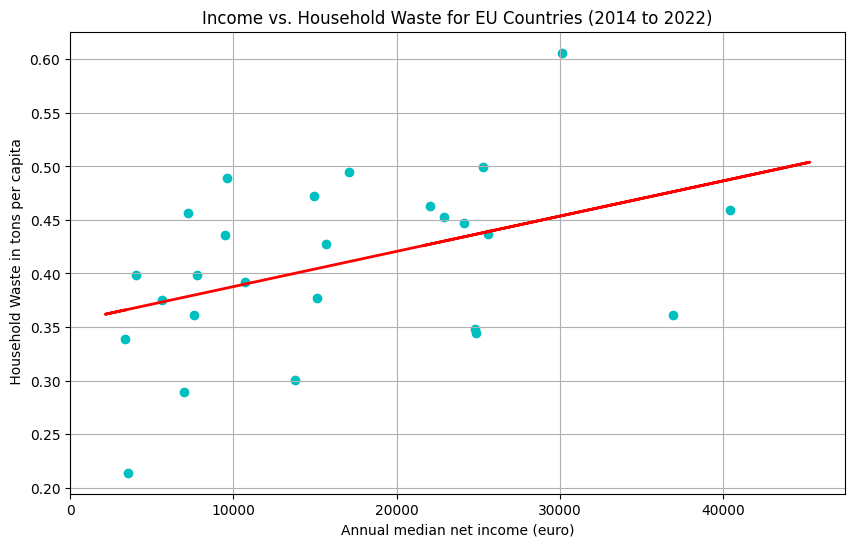

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Get year columns from income2 and euwaste
income_years = income_clean.columns[1:]  # Assuming income columns start from index 1
waste_years = euwaste_clean.columns[1:]  # Assuming waste columns start from index 1

# 2. Define markers and colors for each country
markers = ['o'] # 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', 'H', '+', 'x', 'd', '|', '_', '1', '2', '3', '4', '8', 'P', ',', '.', '>', 's', '<', 'd', '^', 'v','o', '+', 'x', '8', 's', 'p', '*', 'h', 'H', 'D']

colors = ['c'] # 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'lime', 'navy','lightcoral', 'gold', 'indigo', 'darkgreen', 'darkred', 'teal', 'salmon', 'darkblue', 'firebrick', 'darkviolet', 'goldenrod', 'forestgreen', 'dodgerblue', 'crimson', 'deeppink', 'darkorange', 'darkslategray', 'cadetblue', 'sienna', 'mediumseagreen', 'darkorchid']

unique_countries = merged_df['Country'].unique() #Gets the unique country values from the 'Country' column in merged_df
# 3. Create scatter plot for each country
plt.figure(figsize=(10, 6))

for country in unique_countries:
    # Get average income and waste values for the country
    income_val = merged_df.loc[merged_df['Country'] == country, 'Average_x'].values[0]
    waste_val = merged_df.loc[merged_df['Country'] == country, 'Average_y'].values[0]

    # Plot the data for the country with specific marker and color
    plt.scatter(income_val, waste_val, label=country, marker=markers[0], color=colors[0])

# Linear Regression on Scatter Plot Data
# Extract all income and waste values used in the scatter plot
all_income_values = []
all_waste_values = []
for country in unique_countries:
    income_values = []
    waste_values = []
    for year in income_years:
        if year in waste_years:  # Ensure data is available for both income and waste for the year
            try:
                income_val = merged_df.loc[merged_df['Country'] == country, year + '_x'].values[0]
                waste_val = merged_df.loc[merged_df['Country'] == country, year].values[0] if year in merged_df.columns else merged_df.loc[merged_df['Country'] == country, year + '_y'].values[0]
                income_values.append(income_val)
                waste_values.append(waste_val)
            except IndexError:
                pass
    all_income_values.extend(income_values)  # Add to the overall list
    all_waste_values.extend(waste_values)

# Remove NaN values before regression
mask = ~np.isnan(all_income_values) & ~np.isnan(all_waste_values)
all_income_values_cleaned = np.array(all_income_values)[mask]
all_waste_values_cleaned = np.array(all_waste_values)[mask]

# Perform linear regression
X = all_income_values_cleaned.reshape(-1, 1)
y = all_waste_values_cleaned
reg = LinearRegression().fit(X, y)

# Plot regression line on the existing scatter plot
plt.plot(X, reg.predict(X), color='red', linewidth=2, label='Regression Line')

plt.xlabel('Annual median net income (euro)')
plt.ylabel(' Household Waste in tons per capita')
plt.title('Income vs. Household Waste for EU Countries (2014 to 2022)')
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.show()

Regression

In [80]:
# Get regression metrics
coefficient = reg.coef_[0]  # Coefficient of regression (slope)
intercept = reg.intercept_  # Intercept
y_pred = reg.predict(X)  # Predicted values
mse = mean_squared_error(y, y_pred)  # Mean Squared Error
r2 = r2_score(y, y_pred)  # R-squared

# Print regression metrics
print("Coefficient of Regression (slope):", coefficient)
print("Intercept:", intercept)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Coefficient of Regression (slope): 3.2920431990683853e-06
Intercept: 0.3547941404771311
Mean Squared Error (MSE): 0.00668048600545488
R-squared (R2): 0.1474889907713779
